In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

df = pd.read_csv("data/raw/non_rand_discount.csv",sep=";")

In [2]:
# df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   spend_1m_baby          15000 non-null  int64  
 1   spend_2m_baby          15000 non-null  int64  
 2   spend_3m_baby          15000 non-null  int64  
 3   spend_4m_baby          15000 non-null  int64  
 4   spend_5m_baby          15000 non-null  int64  
 5   spend_6m_baby          15000 non-null  float64
 6   spend_1m_clothes       15000 non-null  int64  
 7   spend_2m_clothes       15000 non-null  float64
 8   spend_3m_clothes       15000 non-null  float64
 9   spend_4m_clothes       15000 non-null  float64
 10  spend_5m_clothes       15000 non-null  float64
 11  spend_6m_clothes       15000 non-null  float64
 12  spend_1m_health        15000 non-null  int64  
 13  spend_2m_health        15000 non-null  int64  
 14  spend_3m_health        15000 non-null  int64  
 15  sp

In [3]:
df.discount

0        US$ 125.0
1         US$ 75.0
2         US$ 50.0
3         US$ 10.0
4        US$ 100.0
           ...    
14995    US$ 110.0
14996    US$ 135.0
14997      US$ 0.0
14998    US$ 145.0
14999     US$ 30.0
Name: discount, Length: 15000, dtype: object

In [4]:
# defining a function that replaces US$ for nothing in order to get rid of the non-numerical values
def remove_symbols(discount):
  return float(discount.replace('US$ ', '')) 

In [5]:
remove_symbols("US$ 110.0")

110.0

In [6]:
df.discount = df.discount.apply(remove_symbols)


In [7]:
df2 = df[['sales','discount','profit','age','cust_state','tenure','sales_prediction_bins','sales_prediction']]
df2.head()

,sales,discount,profit,age,cust_state,tenure,sales_prediction_bins,sales_prediction
0,3368.64,125.0,40.06,40,MA,6,8,1351.024765
1,2133.10,75.0,29.52,36,MG,10,4,1035.580387
2,2001.62,50.0,48.08,34,RJ,7,3,992.401825
3,1461.96,10.0,61.64,31,BA,7,1,919.720735
4,2743.72,100.0,34.44,32,PB,6,6,1176.485681


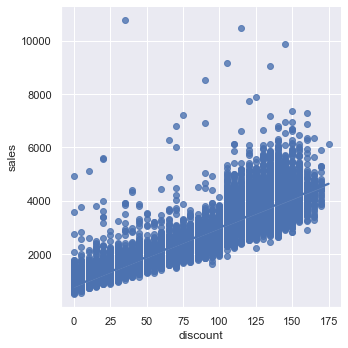

In [8]:
# relationship between discount and sales
sns.lmplot(x="discount", y="sales", data=df)
plt.show()

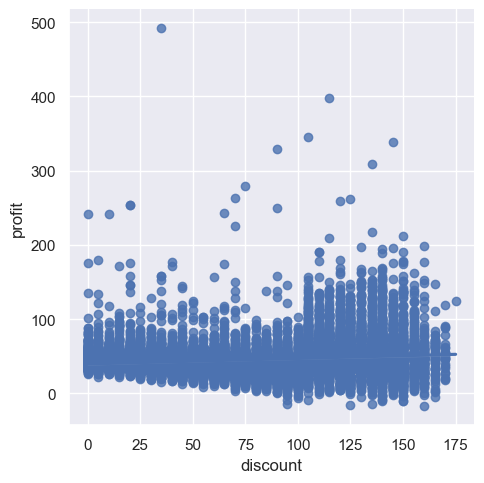

In [9]:
# relationship between discount and profits 
sns.lmplot(x="discount", y="profit", data=df)
plt.show()

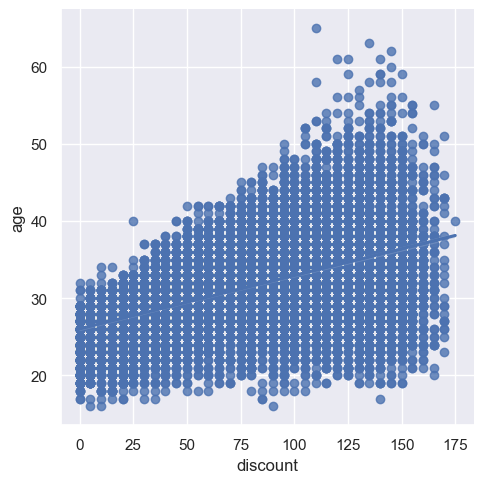

In [10]:
# relationship between age and discount
sns.lmplot(x="discount", y="age", data=df)
plt.show()

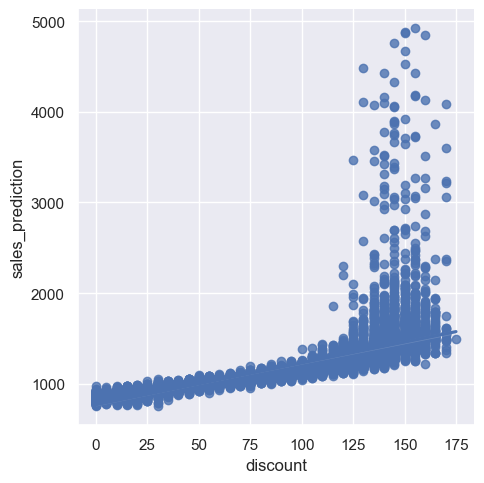

In [11]:
# relationship between sales prediction and discount
sns.lmplot(x="discount", y="sales_prediction", data=df)
plt.show()

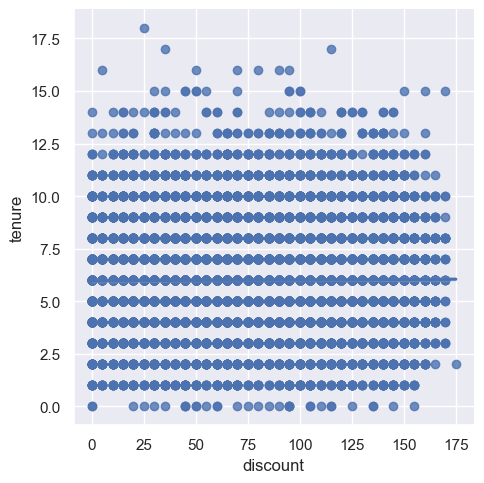

In [12]:
# relationship between tenure and discount
sns.lmplot(x="discount", y="tenure", data=df)
plt.show()

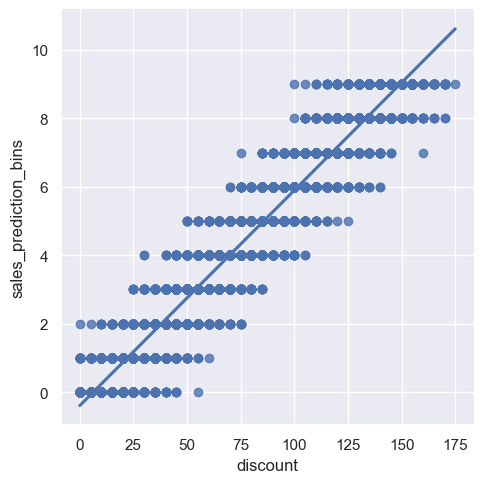

In [13]:
# This is not correct?
# I chose lmplot since it gives you a scatterplot with a linear regresion applied to it, which makes it easier to interpret the data
sns.lmplot(x="discount", y="sales_prediction_bins", data=df)
plt.show()

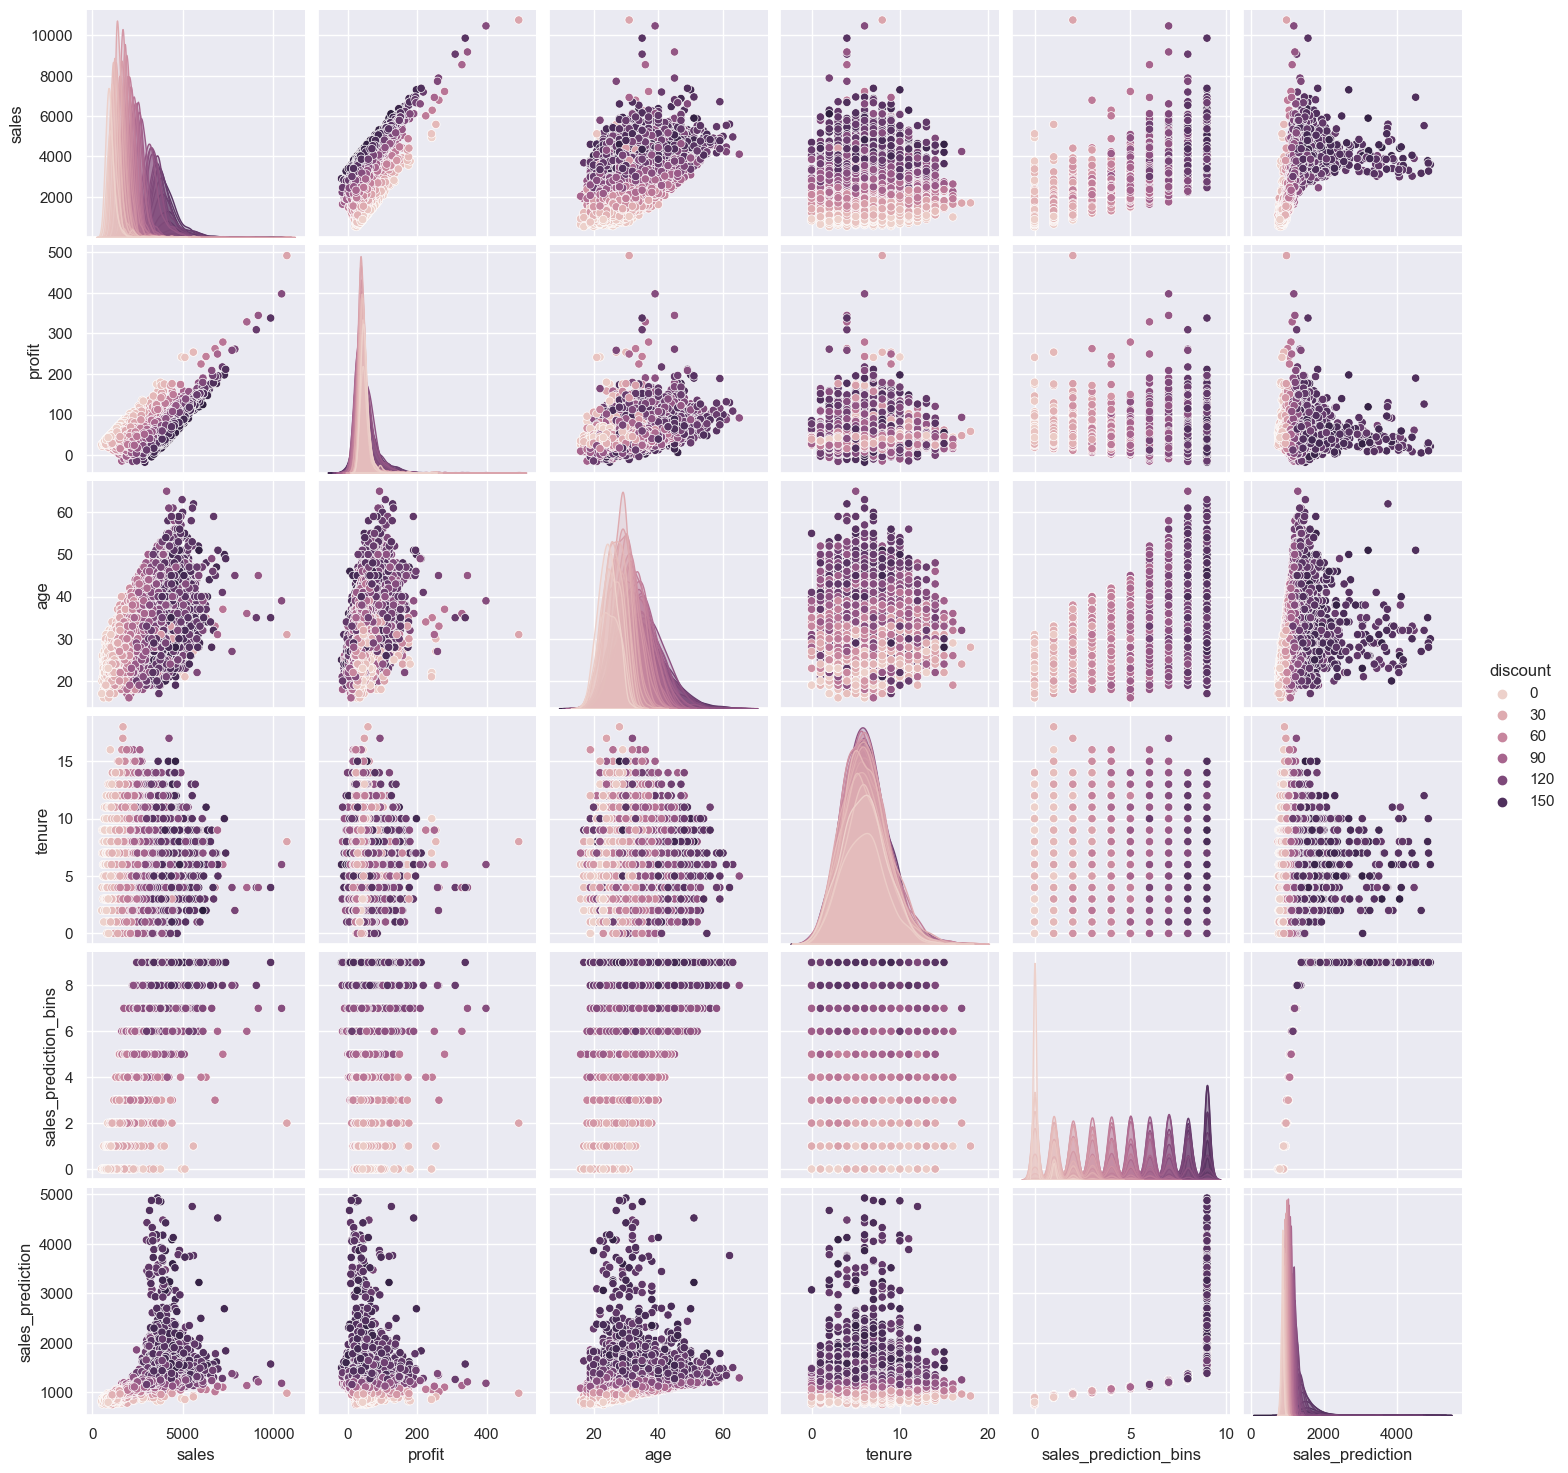

In [14]:
# Interesting comparison between df2 parameters and discount
sns.pairplot(df2, hue='discount')
plt.show()

In [15]:
# Looking at the regression of discount on profits we can expect to ___ for each additional unit of discount.
mod = smf.ols(formula='sales ~ discount', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                 6.341e+04
Date:                Thu, 02 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:50:15   Log-Likelihood:            -1.1363e+05
No. Observations:               15000   AIC:                         2.273e+05
Df Residuals:                   14998   BIC:                         2.273e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    804.5246      7.790    103.274      0.0

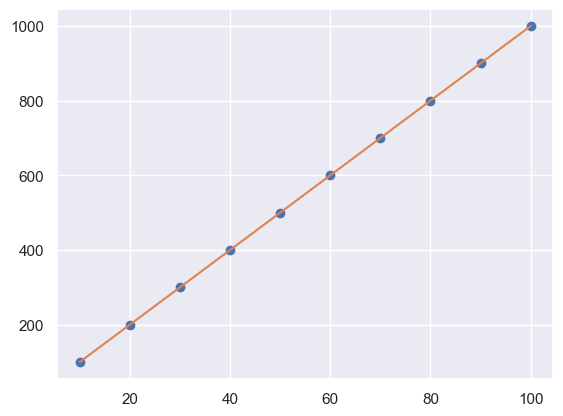

In [16]:
# It is a good fit since R-squared is 0.809, which is pretty close to 1 and the linear regresion graph confirms it
x = np.array([10,20,30,40,50,60,70,80,90,100])
y = np.array([100,200,300,400,500,600,700,800,900,1000])
plt.plot(x,y,'o')
m = 21.9248
b = 804.5246
m,b = np.polyfit(x,y,1)
plt.plot(x,m*x+b)

In [17]:
# Looking at the regression of discount on profits we can expect to ___ for each additional unit of discount.
mod = smf.ols(formula='profit ~ discount', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     303.4
Date:                Thu, 02 Jun 2022   Prob (F-statistic):           2.71e-67
Time:                        16:50:15   Log-Likelihood:                -68395.
No. Observations:               15000   AIC:                         1.368e+05
Df Residuals:                   14998   BIC:                         1.368e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.4217      0.382    103.274      0.0

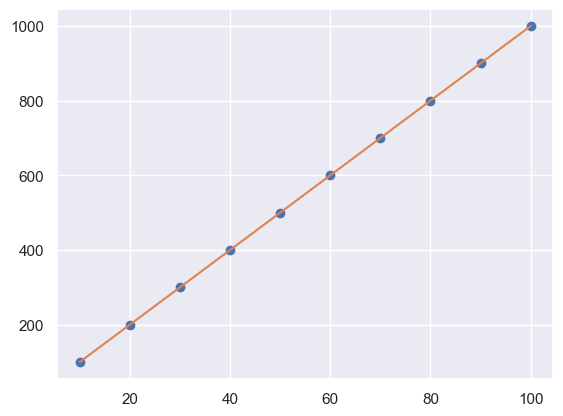

In [18]:
# Although the linear regresion graph says that it is a good fit, R-squared is pretty close to 1. This gives us stron reasons to believe this positive relationship is biased since we are giving more discounts to customers which we already expect to buy more. 
x = np.array([10,20,30,40,50,60,70,80,90,100])
y = np.array([100,200,300,400,500,600,700,800,900,1000])
plt.plot(x,y,'o')
m = 0.0743
b = 39.4217
m,b = np.polyfit(x,y,1)
plt.plot(x,m*x+b)

In [19]:
# Looking at the regression of sales_prediction and age on discount we can expect discounts to change ___ as age and sales_prediction changes
mod = smf.ols(formula='discount ~ sales_prediction + age', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               discount   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                 1.176e+04
Date:                Thu, 02 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:50:16   Log-Likelihood:                -71057.
No. Observations:               15000   AIC:                         1.421e+05
Df Residuals:                   14997   BIC:                         1.421e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -102.3049      1.299  

In [20]:
# x = # It is a good fit since R-squared is 0.809, which is pretty close to 1
# x = np.array([10,20,30,40,50,60,70,80,90,100])
# y = np.array([100,200,300,400,500,600,700,800,900,1000])
# plt.plot(x,y,'o')
# m = 21.9248
# b = 804.5246
# m,b = np.polyfit(x,y,1)
# plt.plot(x,m*x+b)

In [21]:
# Q4 Relationship between discounts and profits
# Q5 Draw a causal graph

In [ ]:
# In order to estimate the impact of discounts on profits, we have to compare customers with the same sales predictions.


In [22]:
mod = smf.ols(formula='discount ~ C(sales_prediction_bins)', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               discount   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 2.552e+04
Date:                Thu, 02 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:58:23   Log-Likelihood:                -57189.
No. Observations:               15000   AIC:                         1.144e+05
Df Residuals:                   14990   BIC:                         1.145e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [25]:
# step 4.2
df_discount_res = df2["discount"] - sales_prediction_bins + df2["discount"].mean()
df_discount_res.head

NameError: name 'sales_prediction_bins' is not defined